In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Importa la constante e0 (permitividad electrica del vacio) para el punto 2
from scipy.constants import epsilon_0

from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

# Problema 1. Metodo regula falsi

In [3]:
def regulaFalsi(f, a, b, tol= 1e-7, maxIter= 1000):
    '''
    Calcula la raiz de f, partiendo de a y b tq f(a) y f(b) tengan signos distintos

    Entradas:
    
    f: Funcion para encontrar las raices
    a: coordenada en x de f(a)
    b: coordenada en x de f(b)
    tol: tolerancia
    maxIter: maximo de iteraciones

    Salidas:

    c: raiz
    '''

    if f(a)*f(b) > 0:
        raise RuntimeError('f(a) y f(b) deben ser de signos distintos')

    terminos = []

    for n in range(maxIter+1):

        c = (a*f(b) - b*f(a))/(f(b) - f(a))

        terminos.append(f(c))

        if abs(f(c)) < tol:
            return c
        elif f(c)*f(a) > 0:
            a = c
        elif f(c)*f(a) > 0:
            b = c
    
    raise RuntimeError('Maximo de iteraciones alcanzado')

C:\Users\luisd_lp9nro0\AppData\Local\Temp\ipykernel_25136\1048480253.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[1].semilogx(tol, conv, 's-')


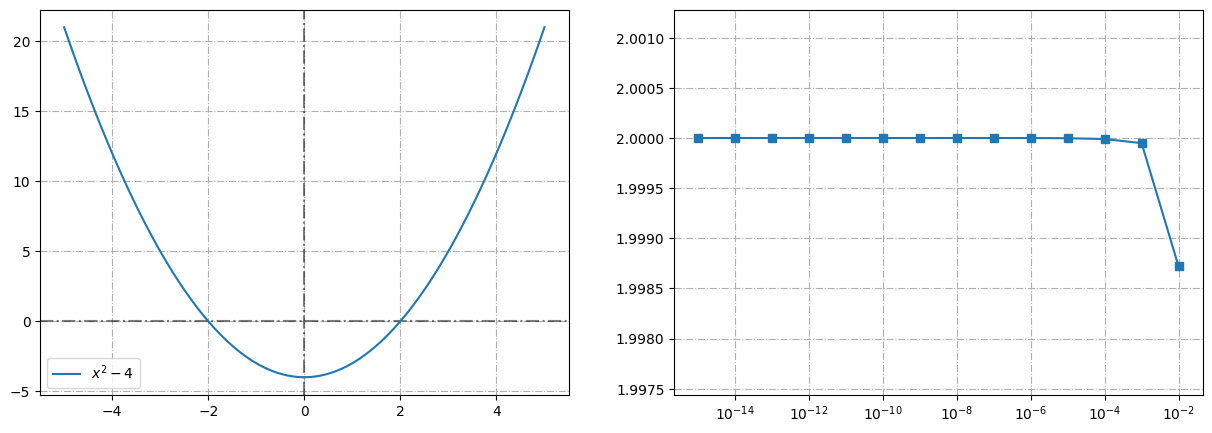

In [4]:
f = lambda x: x**2 - 4

x = np.linspace(-5,5,100)
y = f(x) #Calcula la funcion para graficar

tol0 = 1e-2

#Componentes del eje x y y para el grafico de convergencia
conv = [] #Raices
tol = [] #tolerancias

for n in range(14): #Las tolerancias vam de 1e-2 hasta 1e-2 * 1e-15
    toln = tol0/ 10**n
    convn = regulaFalsi(f, 0, 3, tol= toln)

    tol.append(toln)
    conv.append(convn)

''' ----------------------------------------------------------Graficas-----------------------------------------------------------------'''
fig, ax = plt.subplots(1,2, figsize= (15, 5))

#Grafica x vs f(x)
ax[0].axhline(color= 'Black', linestyle= '-.', alpha= 0.5)
ax[0].axvline(color= 'Black', linestyle= '-.', alpha= 0.5)

ax[0].plot(x, y, label= '$x^2 - 4$')

ax[0].grid(linestyle= '-.')
ax[0].legend()

#Grafica tolerancia vs convergencia
ax[1].axvline(color= 'Black', linestyle= '-.', alpha= 0.5)

ax[1].semilogx(tol, conv, 's-')

ax[1].set_ylim(min(conv)- abs(min(conv) - max(conv)), max(conv) + abs(min(conv) - max(conv)))
ax[1].grid(linestyle= '-.')

# Problema 2. Fuerza electrica

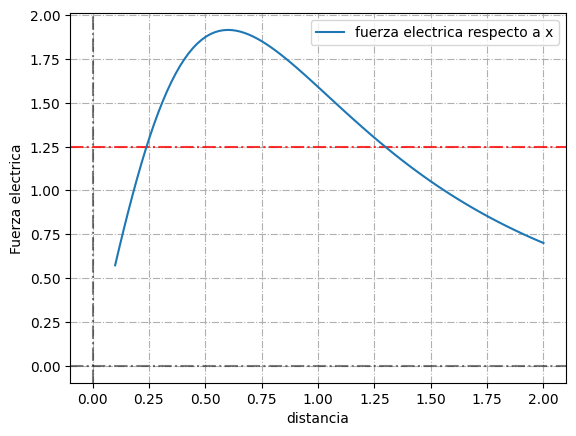

In [5]:
F = lambda x, a: (1/(4*np.pi*epsilon_0))*((2e-5)**2 *x / ((x**2 + a**2)**(3/2))) #Funcion
dF = lambda x, a: (-2*(2e-5)**2 + a**2 *(2e-5)**2)/(4*np.pi*epsilon_0*(x**2+a**2)**(1/2) *(x**2 + a**2)**2) #HP derivada de mrda para F

x = np.linspace(0.1, 2.0, 100)
y = F(x, 0.85)

plt.axhline(color= 'Black', linestyle= '-.', alpha= 0.5)
plt.axvline(color= 'Black', linestyle= '-.', alpha= 0.5)

plt.axhline(1.25, color= 'Red', linestyle= '-.', alpha= 0.8)

plt.plot(x, y, label= 'fuerza electrica respecto a x')

plt.xlabel('distancia')
plt.ylabel('Fuerza electrica')

plt.grid(linestyle= '-.')

plt.legend()

$$F(x) = 1.25N$$
$$F(x) - 1.25N = 0$$

In [6]:
a = 0.85

#F con raiz en 1.25
F1_25 = lambda x: F(x, a) - 1.25

raiz1Newton = newton(F1_25, 0.75, x1= 1.50)
raiz2Newton = newton(F1_25, 0, x1= 0.50)

raiz1Bisec = bisect(F1_25, 0.75, 1.50)
raiz2Bisec = bisect(F1_25, 0, 0.50)

print(f'La primera raiz con el metodo newton fue: {raiz1Newton}\nLa segunda raiz con el metodo de newton fue: {raiz2Newton}\n')
print(f'La segunda raiz con el metodo newton fue: {raiz1Bisec}\nLa segunda raiz con el metodo de newton fue: {raiz2Bisec}')


La primera raiz con el metodo newton fue: 1.2973739416888925
La segunda raiz con el metodo de newton fue: 0.2394492551539222

La segunda raiz con el metodo newton fue: 1.2973739416888748
La segunda raiz con el metodo de newton fue: 0.23944925515570503


# Problema 3. Velocidad ascendente

C:\Users\luisd_lp9nro0\AppData\Local\Temp\ipykernel_25136\549370822.py:1: RuntimeWarning: invalid value encountered in log
  f = lambda t, u, m, q: u*np.log(m/(m - q*t)) - 9.81*t


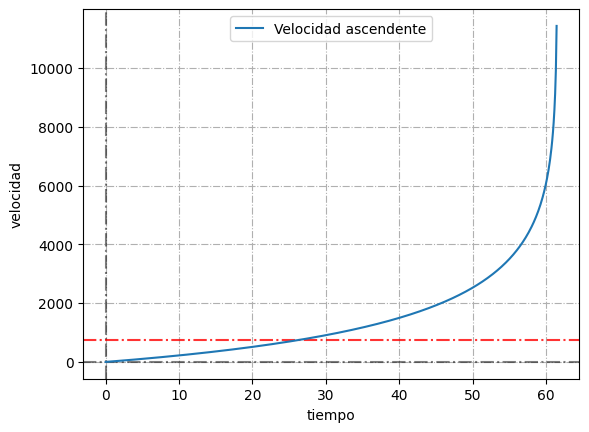

In [7]:
f = lambda t, u, m, q: u*np.log(m/(m - q*t)) - 9.81*t

#Constantes indicadas
m = 1.6e5
u = 1800
q = 2600

#ejes de las graficas
t = np.linspace(0, 100, 1000)
v = f(t, u, m, q)

plt.axhline(color= 'Black', linestyle= '-.', alpha= 0.5)
plt.axvline(color= 'Black', linestyle= '-.', alpha= 0.5)

plt.axhline(750, color= 'Red', linestyle= '-.', alpha= 0.8)

plt.plot(t, v, label= 'Velocidad ascendente')

plt.xlabel('tiempo')
plt.ylabel('velocidad')

plt.grid(linestyle= '-.')

plt.legend()

In [8]:
m = 1.6e5
u = 1800
q = 2600

#f xon raiz en -750
f750 = lambda t: f(t, u, m, q) - 750

raizNewtonV = newton(f750, 25, x1= 35)
raizBiseccionV = bisect(f750, 25, 35)
raizRegulaV = regulaFalsi(f750, 25, 35)

print(f'La raiz con el metodo newton fue: {raizNewtonV}')
print(f'La raiz con el metodo la biseccion fue: {raizBiseccionV}')
print(f'La raiz con el metodo de regulaFalse fue: {raizRegulaV}')

La raiz con el metodo newton fue: 26.40784795596704
La raiz con el metodo la biseccion fue: 26.407847955966872
La raiz con el metodo de regulaFalse fue: 26.407847954384494


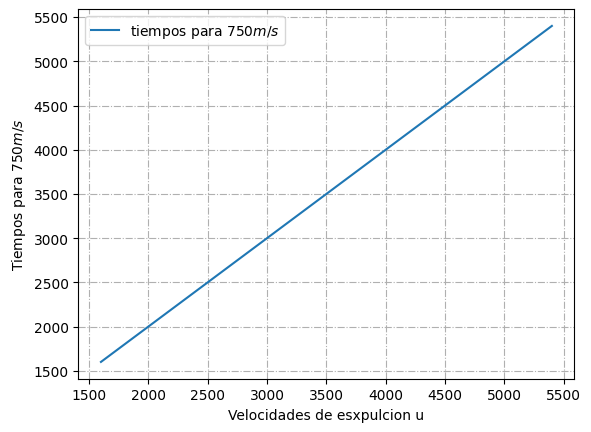

In [11]:
#puntos para tiempo vs velExpulcion
velExpulsion = []
tiempos = []

#vel de expulsion inicial albitraria
u0 = 1600

#varia la velocidad de expulsion sumandole 200
for i in range(20):
    u = u0 + 100*2*i

    tiempo = newton(f750, 25, x1= 35)

    velExpulsion.append(u)
    tiempos.append(u)

plt.plot(velExpulsion, tiempos, label= 'tiempos para $750m/s$')

plt.xlabel('Velocidades de esxpulcion u')
plt.ylabel('Tiempos para $750m/s$')

plt.grid(linestyle= '-.')

plt.legend()

Se puede concluir que el aumento del tiempo en distintos valores de u es lineal 